<a href="https://colab.research.google.com/github/yohanesnuwara/RandomCoolStuffs/blob/master/anscombe_quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@author: Yohanes Nuwara
@email: ign.nuwara97@gmail.com
"""

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

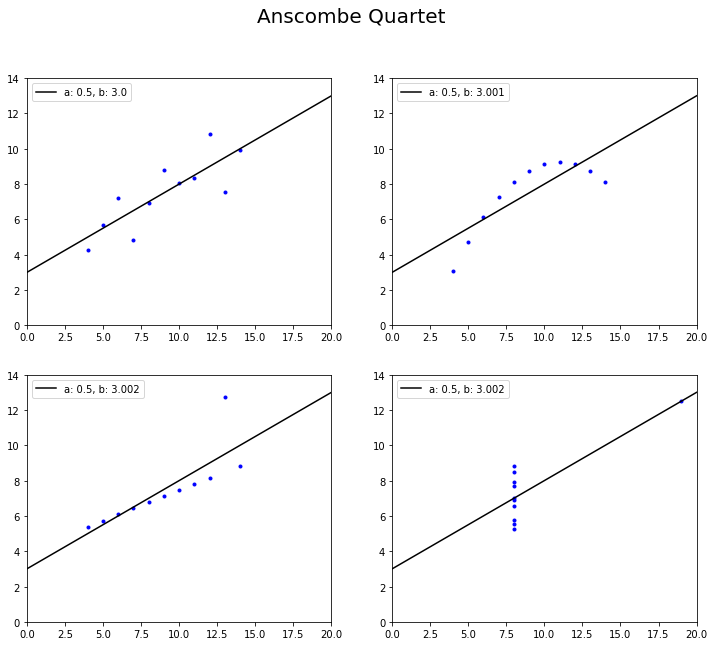

In [13]:
df = pd.read_csv('/content/anscombe.csv')

# retrieve data
x, y = [], []
for i in range(len(df.columns)):
  if i <= 3:
    x_ = df.iloc[:,i].values
    x.append(x_)    
  if i > 3:
    y_ = df.iloc[:,i].values
    y.append(y_)

x = np.array([[x[0], x[1]],
              [x[2], x[3]]])

y = np.array([[y[0], y[1]],
              [y[2], y[3]]])

# do linear regression to data
from scipy.optimize import curve_fit

def linear(x, a, b):
  y = a * x + b
  return y

a, b = np.empty((2,2)), np.empty((2,2))

for i in range(2):
  for j in range(2):
    popt, pcov = curve_fit(linear, x[i,j], y[i,j])
    a_, b_ = popt[0], popt[1]
    a[i,j], b[i,j] = a_, b_

# display the data and the regression line
figs, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
figs.suptitle('Anscombe Quartet', size=20)

for i in range(2):
  for j in range(2):
    # plot data
    ax[i,j].plot(x[i,j], y[i,j], '.', color='blue') 
    # plot regression
    x_interp = np.arange(21)
    y_interp = a[i,j] * x_interp + b[i,j]
    ax[i,j].plot(x_interp, y_interp, color='black', label='a: {}, b: {}'.format(np.round(a[i,j], 3), np.round(b[i,j], 3))) 
    ax[i,j].set_xlim(0, 20)
    ax[i,j].set_ylim(0, 14)
    ax[i,j].legend()

In [5]:
def draw_bs_pairs_linreg(x, y, size=1):
    """
    Perform pairs bootstrap for linear regression.
    Code Ownership: Justin Bois @ Caltech University (Datacamp)
    """

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

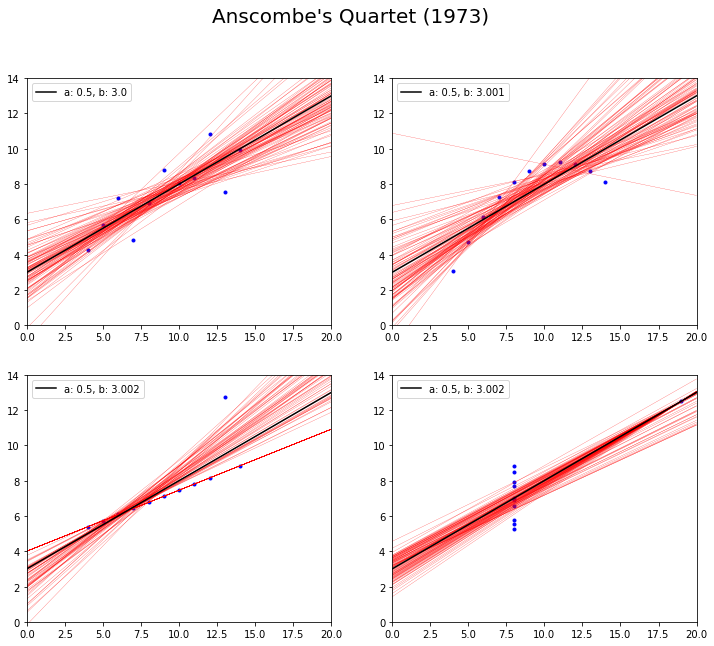

In [14]:
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/anscombe.csv')

# retrieve data
x, y = [], []
for i in range(len(df.columns)):
  if i <= 3:
    x_ = df.iloc[:,i].values
    x.append(x_)    
  if i > 3:
    y_ = df.iloc[:,i].values
    y.append(y_)

x = np.array([[x[0], x[1]],
              [x[2], x[3]]])

y = np.array([[y[0], y[1]],
              [y[2], y[3]]])

# do pair bootstrapping
a1_reps, b1_reps = draw_bs_pairs_linreg(x[0,0], y[0,0], size=500)
a2_reps, b2_reps = draw_bs_pairs_linreg(x[0,1], y[0,1], size=500)
a3_reps, b3_reps = draw_bs_pairs_linreg(x[1,0], y[1,0], size=500)
a4_reps, b4_reps = draw_bs_pairs_linreg(x[1,1], y[1,1], size=500)

a_reps = np.array([[a1_reps, a2_reps],
                   [a3_reps, a4_reps]])
b_reps = np.array([[b1_reps, b2_reps],
                   [b3_reps, b4_reps]])

# display the data and the regression line
figs, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
figs.suptitle(r"Anscombe's Quartet (1973)", size=20)

for i in range(2):
  for j in range(2):
    # plot data
    ax[i,j].plot(x[i,j], y[i,j], '.', color='blue') 
    # plot regression lines of bootstrapped data
    x_interp = np.arange(21)
    for k in range(100):
      y_interp = a_reps[i,j,k] * x_interp + b_reps[i,j,k]
      ax[i,j].plot(x_interp, y_interp, color='red', linewidth=0.2) 
    # plot regression line of the original data 
    x_interp = np.arange(21)
    y_interp = a[i,j] * x_interp + b[i,j]
    ax[i,j].plot(x_interp, y_interp, color='black', label='a: {}, b: {}'.format(np.round(a[i,j], 3), np.round(b[i,j], 3)))         
    
    ax[i,j].set_xlim(0, 20)
    ax[i,j].set_ylim(0, 14)
    ax[i,j].legend()

plt.savefig("/content/anscombe.jpg")